In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
from wordcloud import WordCloud, STOPWORDS

In [2]:
os.chdir('C:\BTS_Master/project/news')

In [3]:
file = open('sports/news_0003575.json', encoding="utf8")

data = json.load(file)

file.close()

In [4]:
data['text']

'Ice Flyers set roster, start season Bill Vilona, bvilona@pnj.com 12:22 p.m. CDT October 22, 2015 Adam Pawlick was named Wednesday as the Pensacola Ice Flyers team captain when their roster was finalized. (Photo: Bruce Graner/bgraner@pnj.com) 113 CONNECT 4 TWEET LINKEDIN COMMENT EMAIL MORE \nA new season begins Friday for the Pensacola Ice Flyers with a couple of firsts. \nThey embark on their longest regular season by starting with the longest road trip. After finalizing their roster earlier in the day and announcing it, the team left Pensacola before dusk Wednesday night and traveled 16 hours to Peoria, Ill. The Ice Flyers practice at 2 p.m. Thursday in final prep for the season-opener Friday night against the Peoria Rivermen. The two teams play again Saturday. \nThe games begin the Ice Flyers\' seventh season in the Southern Professional Hockey League and the 20th year since minor league hockey first arrived in the Pensacola area. The SPHL has extended this season two weeks longer, 

In [5]:
def create_dataframe(news_type):
    text = []
    title = []
    date = []
    url = []
    site = []


    for file in os.listdir('C:\BTS_Master/project/news/' + str(news_type)):
        with open(str(news_type) + '/' + file, encoding="utf8") as f:
            data = json.load(f)
            text.append(data['text'])
            title.append(data['title'])
            date.append(data['published'])
            url.append(data['url'])
            site.append(data['thread']['site'])
    
    df = pd.DataFrame()
    df['text'] = text
    df['title'] = title
    df['date'] = date
    df['url'] = url
    df['website'] = site
    
    return df


In [6]:
travel = create_dataframe('travel')

In [7]:
travel.head()

,text,title,date,url,website
0,California’s North County rewards cyclists wit...,California’s North County rewards cyclists wit...,2015-07-28T19:05:00.000+03:00,http://www.stuttgartdailyleader.com/article/20...,stuttgartdailyleader.com
1,Other Articles China stocks fall as Beijing re...,Asian stocks hit 3-week lows as China gloom sp...,2015-07-28T16:14:00.000+03:00,http://www.financialexpress.com/article/market...,financialexpress.com
2,MEXICO CITY - Authorities on Mexico's Caribbea...,Mexico struggles to clean up surge of seaweed ...,2015-07-28T01:40:00.000+03:00,http://www.winnipegfreepress.com/travel/mexico...,winnipegfreepress.com
3,Chinese airline launches Xiamen-Amsterdam rout...,Chinese airline launches Xiamen-Amsterdam route,2015-07-28T04:33:00.000+03:00,http://www.eturbonews.com/61909/chinese-airlin...,eturbonews.com
4,Telegraphsportpage Follow @telegraphsport,"The Ashes 2015: All is not lost for England, b...",2015-07-29T00:16:00.000+03:00,http://www.telegraph.co.uk/sport/cricket/inter...,telegraph.co.uk


In [8]:
travel.shape

(14064, 5)

In [9]:
travel['type'] = 1

In [10]:
entertainment = create_dataframe('entertainment')
entertainment['type'] = 2

financial = create_dataframe('financial')
financial['type'] = 3

political = create_dataframe('political')
political['type'] = 4

sports = create_dataframe('sports')
sports['type'] = 5

technology = create_dataframe('technology')
technology['type'] = 6

In [11]:
df = pd.concat([travel, entertainment, financial, political, sports, technology])

In [12]:
df.head()

,text,title,date,url,website,type
0,California’s North County rewards cyclists wit...,California’s North County rewards cyclists wit...,2015-07-28T19:05:00.000+03:00,http://www.stuttgartdailyleader.com/article/20...,stuttgartdailyleader.com,1
1,Other Articles China stocks fall as Beijing re...,Asian stocks hit 3-week lows as China gloom sp...,2015-07-28T16:14:00.000+03:00,http://www.financialexpress.com/article/market...,financialexpress.com,1
2,MEXICO CITY - Authorities on Mexico's Caribbea...,Mexico struggles to clean up surge of seaweed ...,2015-07-28T01:40:00.000+03:00,http://www.winnipegfreepress.com/travel/mexico...,winnipegfreepress.com,1
3,Chinese airline launches Xiamen-Amsterdam rout...,Chinese airline launches Xiamen-Amsterdam route,2015-07-28T04:33:00.000+03:00,http://www.eturbonews.com/61909/chinese-airlin...,eturbonews.com,1
4,Telegraphsportpage Follow @telegraphsport,"The Ashes 2015: All is not lost for England, b...",2015-07-29T00:16:00.000+03:00,http://www.telegraph.co.uk/sport/cricket/inter...,telegraph.co.uk,1


In [13]:
df.shape

(96015, 6)

### Lets calculate the lenght of the text and how many words each news has

In [14]:
df['lenght'] = df['text'].apply(lambda x: len(x))
df['words'] = df['text'].apply(lambda x: len(x.split()))

In [15]:
df.head()

,text,title,date,url,website,type,lenght,words
0,California’s North County rewards cyclists wit...,California’s North County rewards cyclists wit...,2015-07-28T19:05:00.000+03:00,http://www.stuttgartdailyleader.com/article/20...,stuttgartdailyleader.com,1,4177,742
1,Other Articles China stocks fall as Beijing re...,Asian stocks hit 3-week lows as China gloom sp...,2015-07-28T16:14:00.000+03:00,http://www.financialexpress.com/article/market...,financialexpress.com,1,3241,543
2,MEXICO CITY - Authorities on Mexico's Caribbea...,Mexico struggles to clean up surge of seaweed ...,2015-07-28T01:40:00.000+03:00,http://www.winnipegfreepress.com/travel/mexico...,winnipegfreepress.com,1,1729,295
3,Chinese airline launches Xiamen-Amsterdam rout...,Chinese airline launches Xiamen-Amsterdam route,2015-07-28T04:33:00.000+03:00,http://www.eturbonews.com/61909/chinese-airlin...,eturbonews.com,1,2382,378
4,Telegraphsportpage Follow @telegraphsport,"The Ashes 2015: All is not lost for England, b...",2015-07-29T00:16:00.000+03:00,http://www.telegraph.co.uk/sport/cricket/inter...,telegraph.co.uk,1,41,3


### And plot the distribuition of the lenght

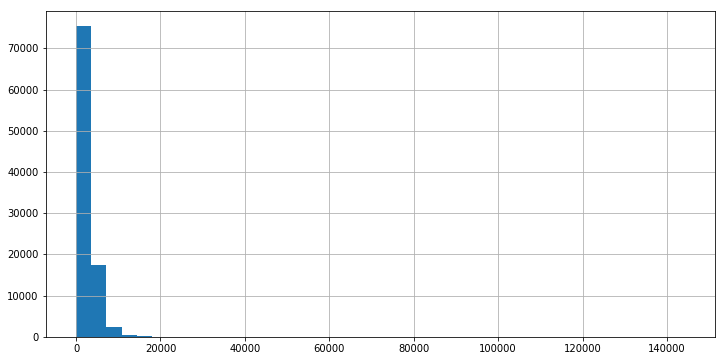

In [16]:
plt.figure(figsize=(12,6))
df['lenght'].hist(bins=40)

### there are a few texts with a very large lenght, lets ignore those and plot again

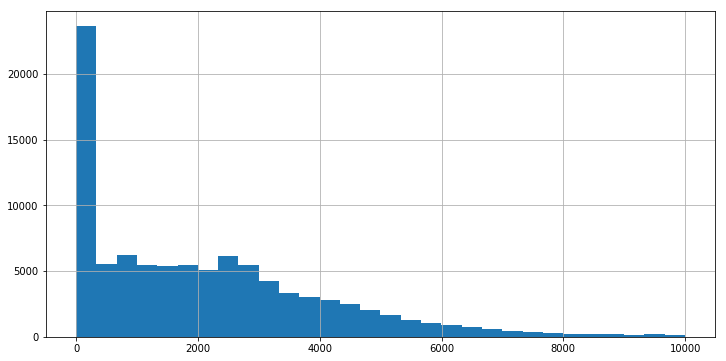

In [17]:
short = df[df['lenght'] < 10000]
plt.figure(figsize=(12,6))
short['lenght'].hist(bins=30)

### Lets see how the distribuition of the lenght for the different types of news

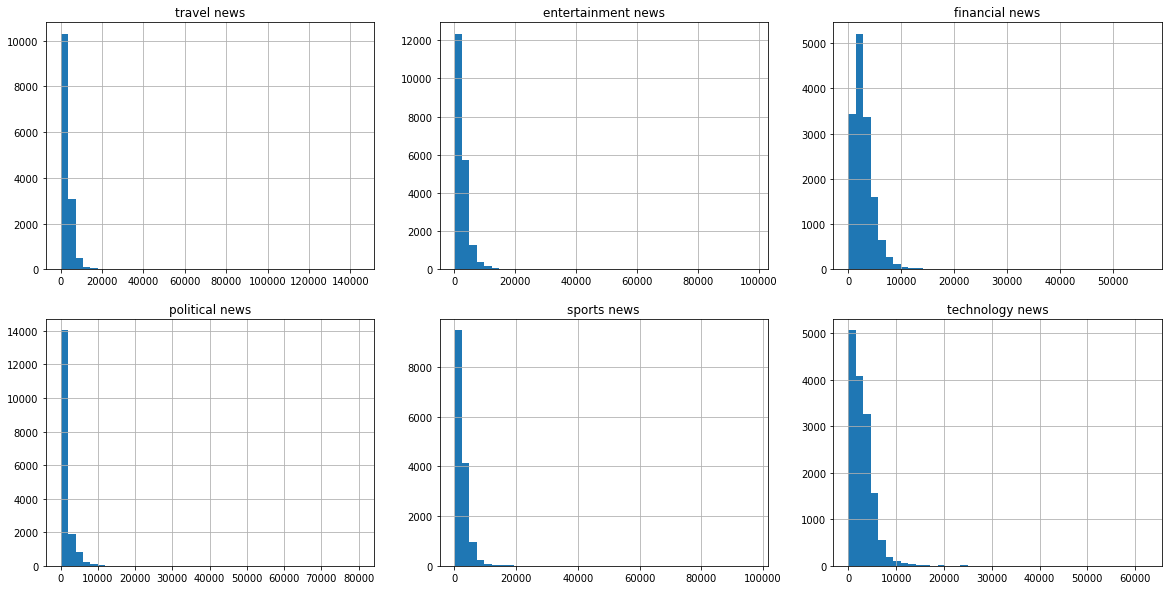

In [18]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

df[df.type == 1].lenght.hist(ax=axs[0,0], bins=40)
axs[0,0].set_title('travel news')
df[df.type == 2].lenght.hist(ax=axs[0,1], bins=40)
axs[0,1].set_title('entertainment news')
df[df.type == 3].lenght.hist(ax=axs[0,2], bins=40)
axs[0,2].set_title('financial news')
df[df.type == 4].lenght.hist(ax=axs[1,0], bins=40)
axs[1,0].set_title('political news')
df[df.type == 5].lenght.hist(ax=axs[1,1], bins=40)
axs[1,1].set_title('sports news')
df[df.type == 6].lenght.hist(ax=axs[1,2], bins=40)
axs[1,2].set_title('technology news');

### This it isnt very informative, lets see it once again ignoring the longer texts

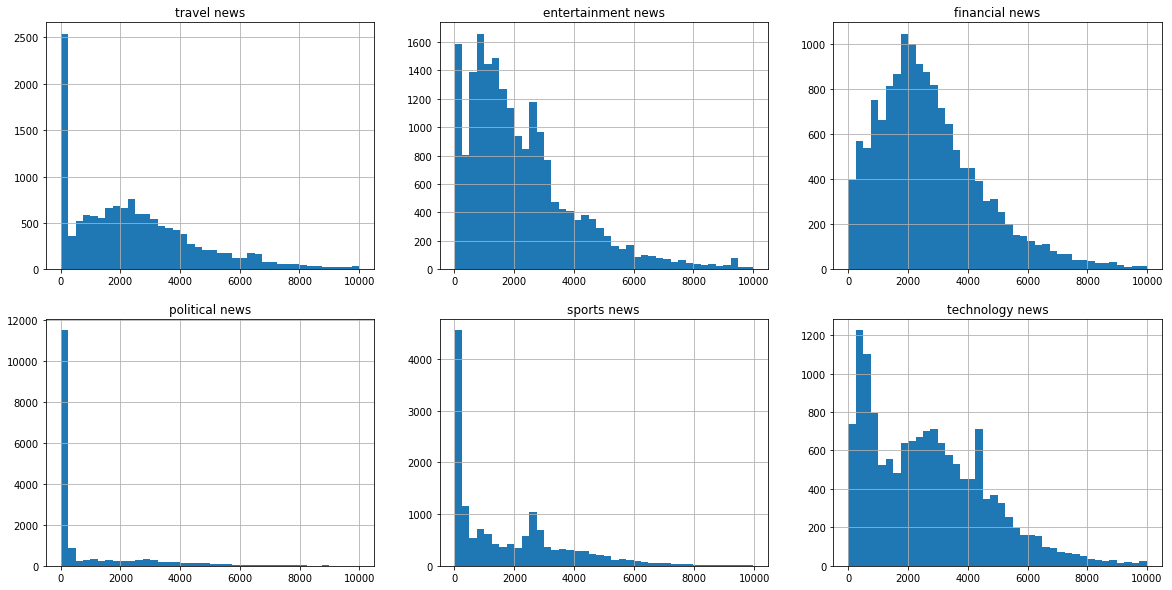

In [19]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

short[short.type == 1].lenght.hist(ax=axs[0,0], bins=40)
axs[0,0].set_title('travel news')
short[short.type == 2].lenght.hist(ax=axs[0,1], bins=40)
axs[0,1].set_title('entertainment news')
short[short.type == 3].lenght.hist(ax=axs[0,2], bins=40)
axs[0,2].set_title('financial news')
short[short.type == 4].lenght.hist(ax=axs[1,0], bins=40)
axs[1,0].set_title('political news')
short[short.type == 5].lenght.hist(ax=axs[1,1], bins=40)
axs[1,1].set_title('sports news')
short[short.type == 6].lenght.hist(ax=axs[1,2], bins=40)
axs[1,2].set_title('technology news');

In [20]:
shortest = df[df['lenght'] < 500]

In [21]:
len(shortest)

26301

In [22]:
len(shortest) / len(df)

0.27392594907045775

### 27% of the news text in our dataset is shorter than 500 characters, we will probably need to ignore those, there is no point in making a summary of something so short

### Looking at the number of words

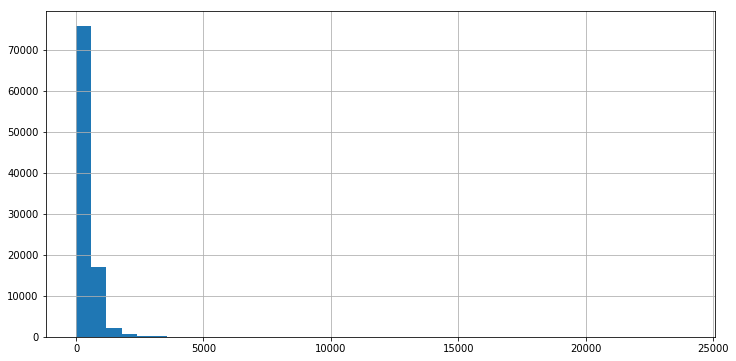

In [23]:
plt.figure(figsize=(12,6))
df['words'].hist(bins=40)

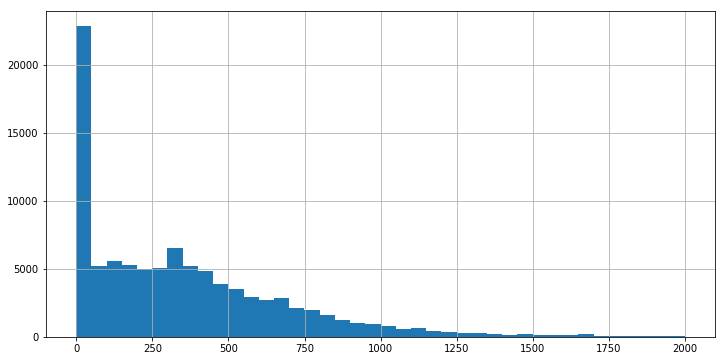

In [24]:
words = df[df['words'] < 2000]
plt.figure(figsize=(12,6))
words.words.hist(bins=40)

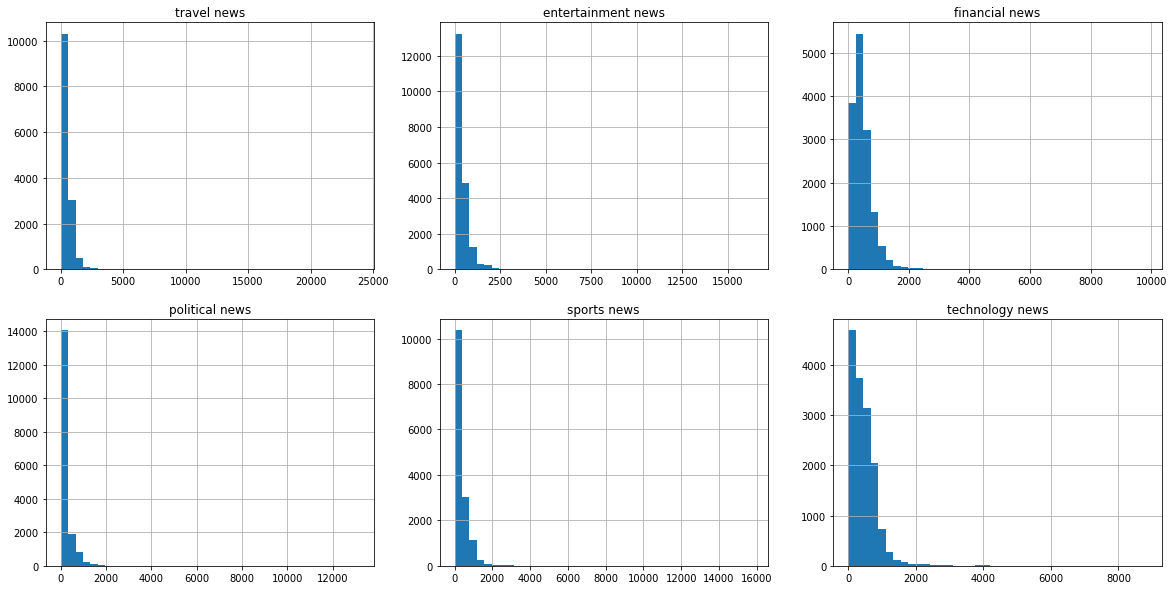

In [25]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

df[df.type == 1].words.hist(ax=axs[0,0], bins=40)
axs[0,0].set_title('travel news')
df[df.type == 2].words.hist(ax=axs[0,1], bins=40)
axs[0,1].set_title('entertainment news')
df[df.type == 3].words.hist(ax=axs[0,2], bins=40)
axs[0,2].set_title('financial news')
df[df.type == 4].words.hist(ax=axs[1,0], bins=40)
axs[1,0].set_title('political news')
df[df.type == 5].words.hist(ax=axs[1,1], bins=40)
axs[1,1].set_title('sports news')
df[df.type == 6].words.hist(ax=axs[1,2], bins=40)
axs[1,2].set_title('technology news');

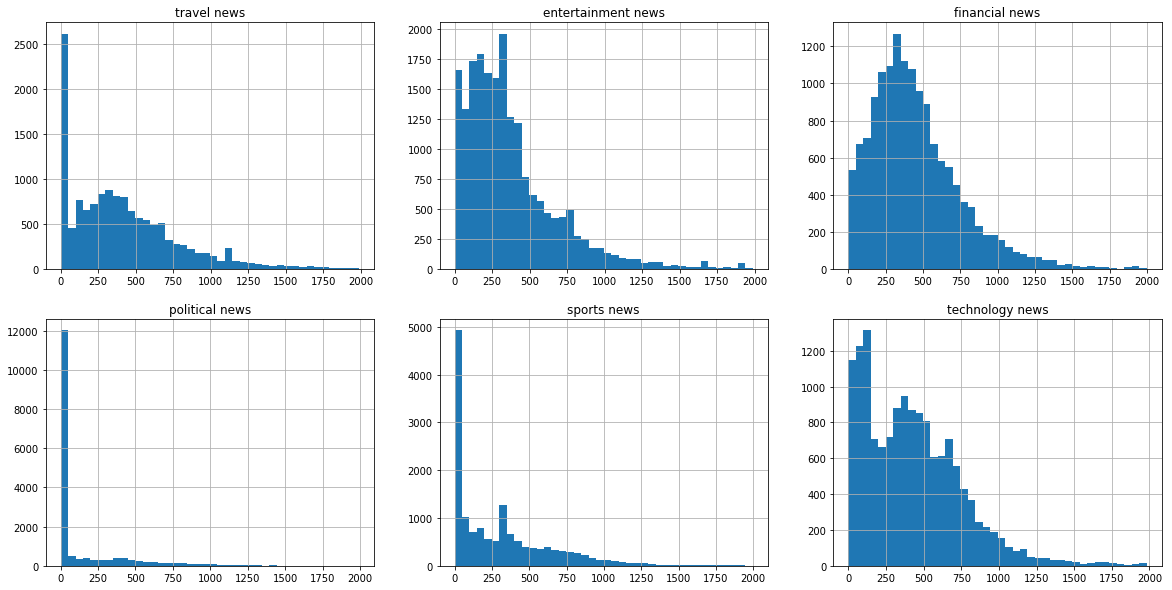

In [26]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

words[words.type == 1].words.hist(ax=axs[0,0], bins=40)
axs[0,0].set_title('travel news')
words[words.type == 2].words.hist(ax=axs[0,1], bins=40)
axs[0,1].set_title('entertainment news')
words[words.type == 3].words.hist(ax=axs[0,2], bins=40)
axs[0,2].set_title('financial news')
words[words.type == 4].words.hist(ax=axs[1,0], bins=40)
axs[1,0].set_title('political news')
words[words.type == 5].words.hist(ax=axs[1,1], bins=40)
axs[1,1].set_title('sports news')
words[words.type == 6].words.hist(ax=axs[1,2], bins=40)
axs[1,2].set_title('technology news');

In [27]:
short_words = df[df.words <= 150]

In [28]:
len(short_words)

33966

In [29]:
len(short_words) / len(df)

0.353757225433526

### around 35% of the news have less than 150 words, we can also use this reference to pick the news to choose

In [30]:
df.shape

(96015, 8)

### Lets see the different sources of the news

In [31]:
web_counts = df[df.type == 1].website.value_counts().head(10).reset_index()
print('top 10 sources of the travel news')
web_counts

top 10 sources of the travel news


,index,website
0,telegraph.co.uk,2888
1,eturbonews.com,975
2,travelandtourworld.com,822
3,incentivetravel.co.uk,411
4,about.com,401
5,adelaidenow.com.au,299
6,winnipegfreepress.com,282
7,bizjournals.com,260
8,thestreet.com,241
9,ticotimes.net,228


In [32]:
web_counts = df[df.type == 2].website.value_counts().head(10).reset_index()
print('top 10 sources of the entertainment news')
web_counts

top 10 sources of the entertainment news


,index,website
0,industriesnews.net,1277
1,cbs8.com,760
2,palmbeachpost.com,658
3,wpxi.com,613
4,whio.com,597
5,news24.com,522
6,wsoctv.com,455
7,newsr.in,416
8,chicagotribune.com,410
9,yahoo.com,404


In [33]:
web_counts = df[df.type == 3].website.value_counts().head(10).reset_index()
print('top 10 sources of the financial news')
web_counts

top 10 sources of the financial news


,index,website
0,yahoo.com,3461
1,reuters.com,1282
2,afr.com,1080
3,thestreet.com,1002
4,bloomberg.com,859
5,allafrica.com,656
6,menafn.com,436
7,moneylife.in,348
8,smh.com.au,324
9,financialexpress.com,308


In [34]:
web_counts = df[df.type == 4].website.value_counts().head(10).reset_index()
print('top 10 sources of the political news')
web_counts

top 10 sources of the political news


,index,website
0,newsdump.com,8809
1,wn.com,3154
2,cbs8.com,521
3,journal-news.com,274
4,whio.com,262
5,usnews.com,260
6,beforeitsnews.com,213
7,washingtonexaminer.com,133
8,politico.com,109
9,cnn.com,106


In [35]:
web_counts = df[df.type == 5].website.value_counts().head(10).reset_index()
print('top 10 sources of the sports news')
web_counts

top 10 sources of the sports news


,index,website
0,newsdump.com,4548
1,wpxi.com,500
2,wftv.com,497
3,whio.com,319
4,wsoctv.com,319
5,journal-news.com,314
6,wtop.com,215
7,palmbeachpost.com,212
8,msn.com,180
9,uniondemocrat.com,152


In [36]:
web_counts = df[df.type == 6].website.value_counts().head(10).reset_index()
print('top 10 sources of the technology news')
web_counts

top 10 sources of the technology news


,index,website
0,freshnews.com,1254
1,industriesnews.net,1064
2,news24.com,1021
3,reuters.com,941
4,cbs8.com,719
5,bio-medicine.org,571
6,newsr.in,487
7,prweb.com,401
8,phys.org,359
9,google.com,327


### The main source of political and sports news is the website newsdump, this are also the categories that have a large ammount of short news, maybe this is related? 

In [37]:
newsdump = df[df.website == 'newsdump.com']

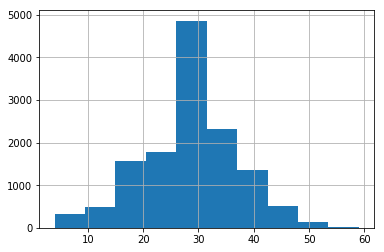

In [38]:
newsdump.words.hist()

In [39]:
newsdump.text.values[10]

'Published By: USATODAY.com: Music - Today \nSoft lighting, goofy dance moves and some incredible Drizzy fashion. ... Read Full Story ... Related articles:'

### Since this news were webscraped they failed to scrape correctly the news from this website, we only have the beggining of the entire new.
### We will delete the news from this website

In [40]:
df = df[df.website != 'newsdump.com']

In [41]:
df.shape

(82658, 8)

In [42]:
web_counts = df[df.type == 4].website.value_counts().head(10).reset_index()
print('top 10 sources of the political news')
web_counts

top 10 sources of the political news


,index,website
0,wn.com,3154
1,cbs8.com,521
2,journal-news.com,274
3,whio.com,262
4,usnews.com,260
5,beforeitsnews.com,213
6,washingtonexaminer.com,133
7,politico.com,109
8,cnn.com,106
9,editorialcartoonists.com,100


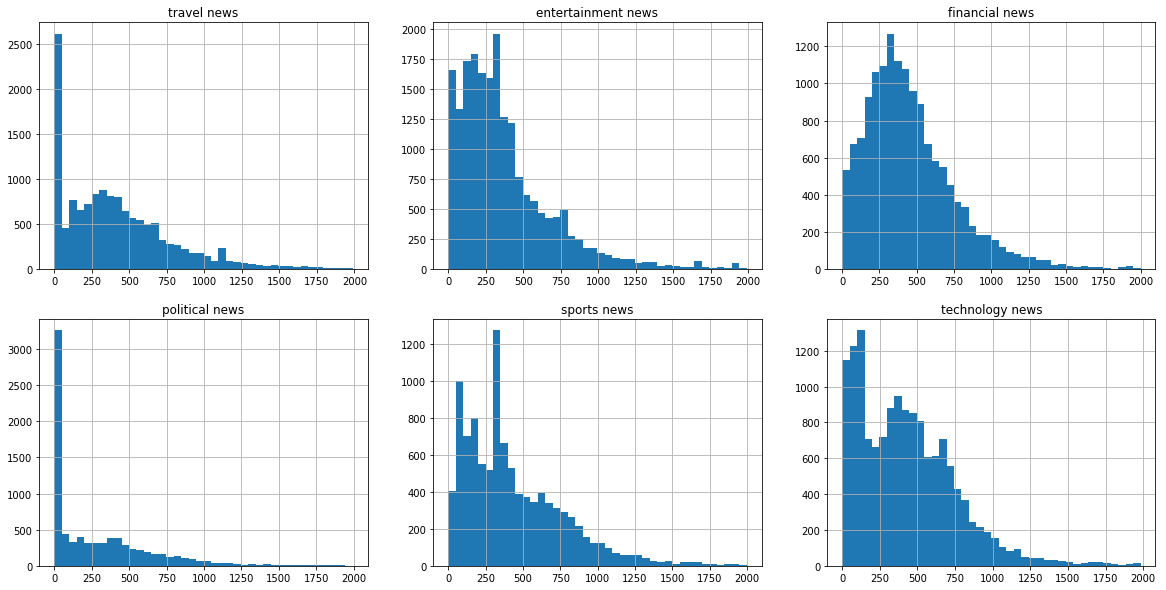

In [43]:
words2 = df[df['words'] < 2000]

fig, axs = plt.subplots(2,3, figsize=(20,10))

words2[words2.type == 1].words.hist(ax=axs[0,0], bins=40)
axs[0,0].set_title('travel news')
words2[words2.type == 2].words.hist(ax=axs[0,1], bins=40)
axs[0,1].set_title('entertainment news')
words2[words2.type == 3].words.hist(ax=axs[0,2], bins=40)
axs[0,2].set_title('financial news')
words2[words2.type == 4].words.hist(ax=axs[1,0], bins=40)
axs[1,0].set_title('political news')
words2[words2.type == 5].words.hist(ax=axs[1,1], bins=40)
axs[1,1].set_title('sports news')
words2[words2.type == 6].words.hist(ax=axs[1,2], bins=40)
axs[1,2].set_title('technology news');

### It improved the histograms but we still have too many short news, maybe the same problem happened in others websites? better to just remove those short news

### Removing the short news

In [44]:
news = df[df['words'] > 150] 

In [45]:
news.shape[0]/96015

0.6462427745664739

### After removing the news with  less than 150 word we have around 64% of the original dataset, it should be enough, if it isnt enough we can always get more data
### better to remove the news that are too long too, for now, to save processing times

In [46]:
news = news[(news['lenght'] < 10000) & (news['words'] < 2000)]

In [47]:
news.shape

(60835, 8)

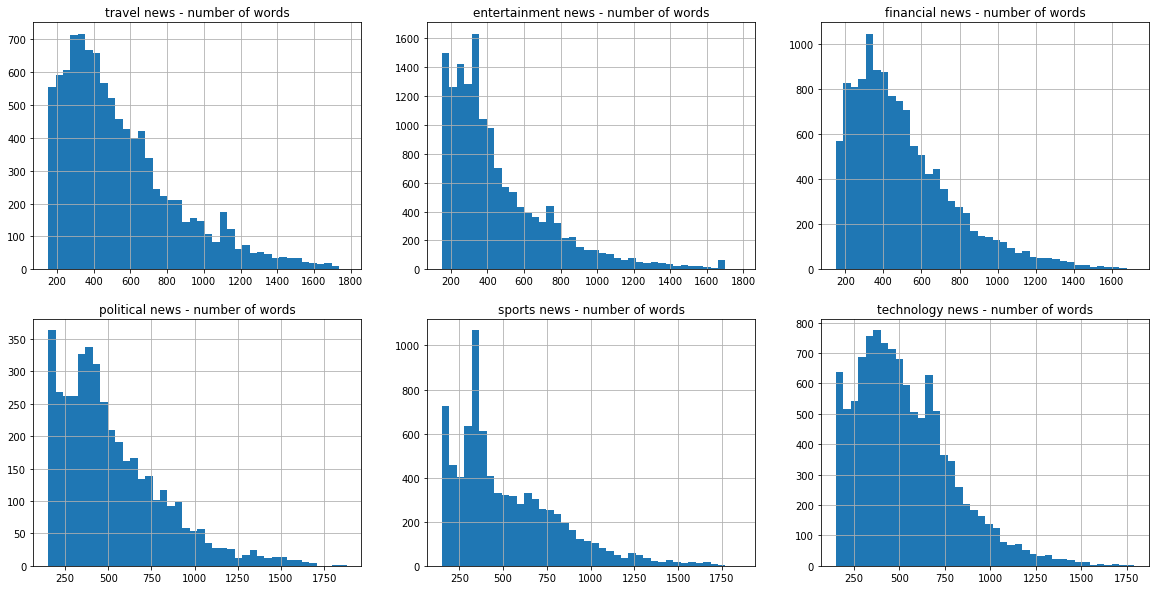

In [48]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

news[news.type == 1].words.hist(ax=axs[0,0], bins=40)
axs[0,0].set_title('travel news - number of words')
news[news.type == 2].words.hist(ax=axs[0,1], bins=40)
axs[0,1].set_title('entertainment news - number of words')
news[news.type == 3].words.hist(ax=axs[0,2], bins=40)
axs[0,2].set_title('financial news - number of words')
news[news.type == 4].words.hist(ax=axs[1,0], bins=40)
axs[1,0].set_title('political news - number of words')
news[news.type == 5].words.hist(ax=axs[1,1], bins=40)
axs[1,1].set_title('sports news - number of words')
news[news.type == 6].words.hist(ax=axs[1,2], bins=40)
axs[1,2].set_title('technology news - number of words');

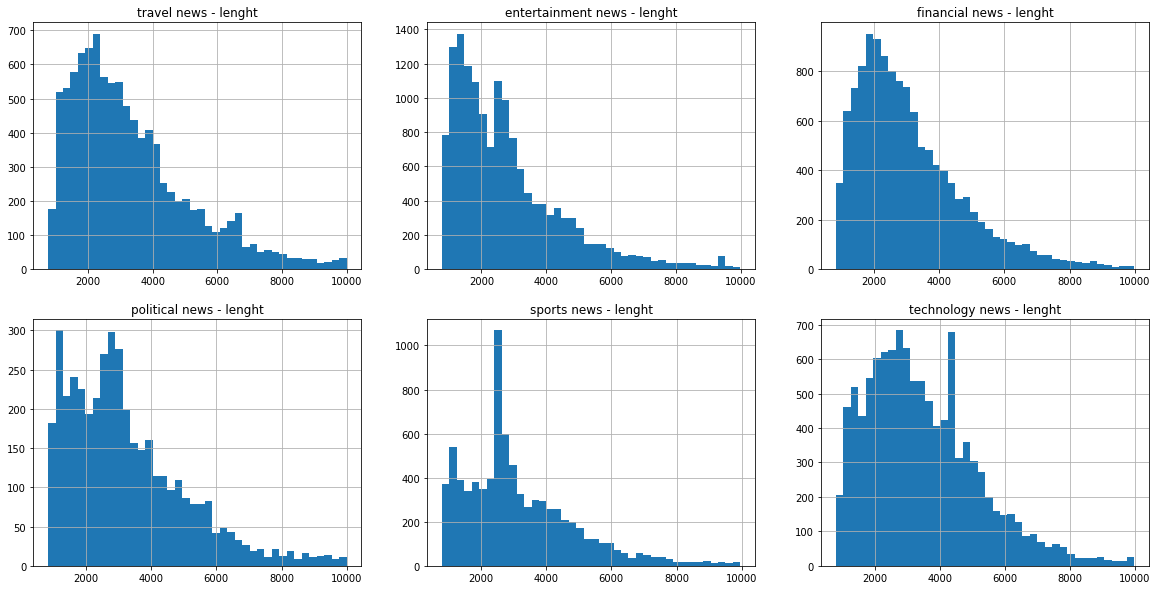

In [49]:
fig, axs = plt.subplots(2,3, figsize=(20,10))

news[news.type == 1].lenght.hist(ax=axs[0,0], bins=40)
axs[0,0].set_title('travel news - lenght')
news[news.type == 2].lenght.hist(ax=axs[0,1], bins=40)
axs[0,1].set_title('entertainment news - lenght')
news[news.type == 3].lenght.hist(ax=axs[0,2], bins=40)
axs[0,2].set_title('financial news - lenght')
news[news.type == 4].lenght.hist(ax=axs[1,0], bins=40)
axs[1,0].set_title('political news - lenght')
news[news.type == 5].lenght.hist(ax=axs[1,1], bins=40)
axs[1,1].set_title('sports news - lenght')
news[news.type == 6].lenght.hist(ax=axs[1,2], bins=40)
axs[1,2].set_title('technology news - lenght');

### We have 60k news articles, should be enough

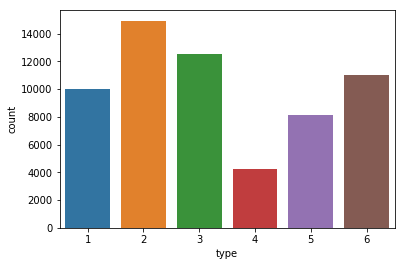

In [50]:
sns.countplot(news.type)

#### because we had a lot more short news in some categories we end up with unbalanced number of news for each type. The biggest problem is the Political news where we have only 4k news.
#### We can add more political news to the dataset trying to make it more balanced

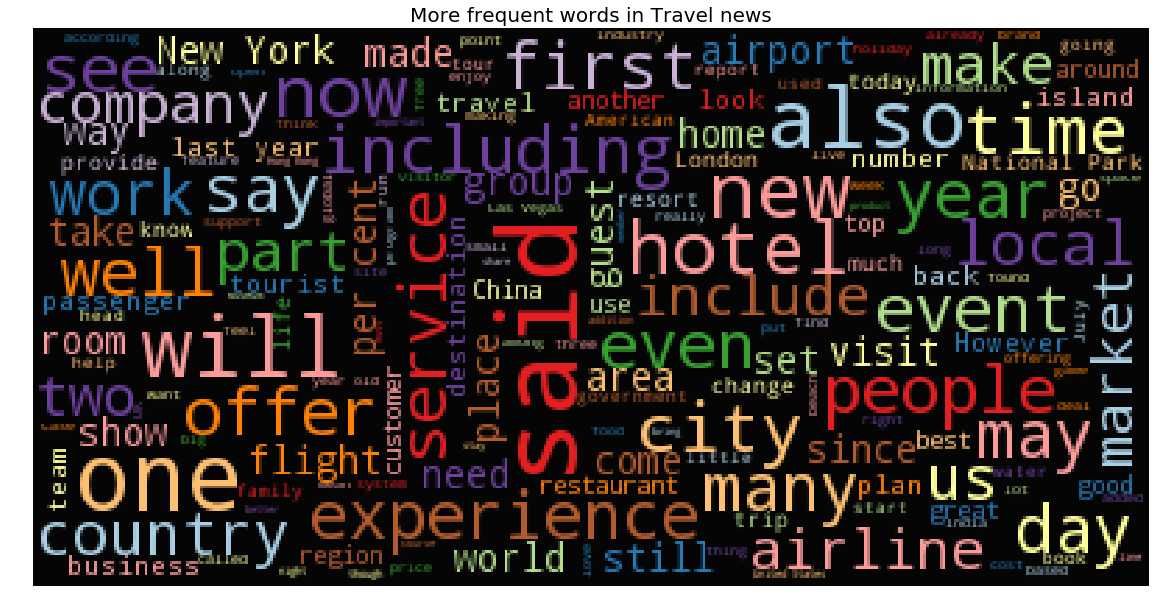

In [52]:
news_wc = news.text[news.type == 1]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Travel news", fontsize=20);

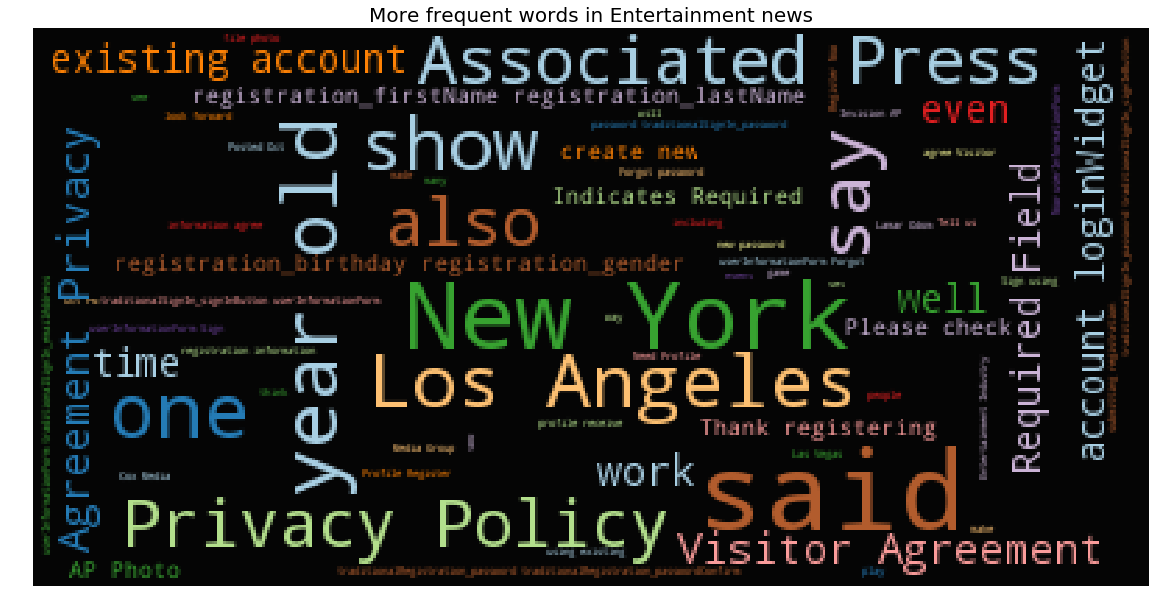

In [53]:
news_wc = news.text[news.type == 2]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Entertainment news", fontsize=20);

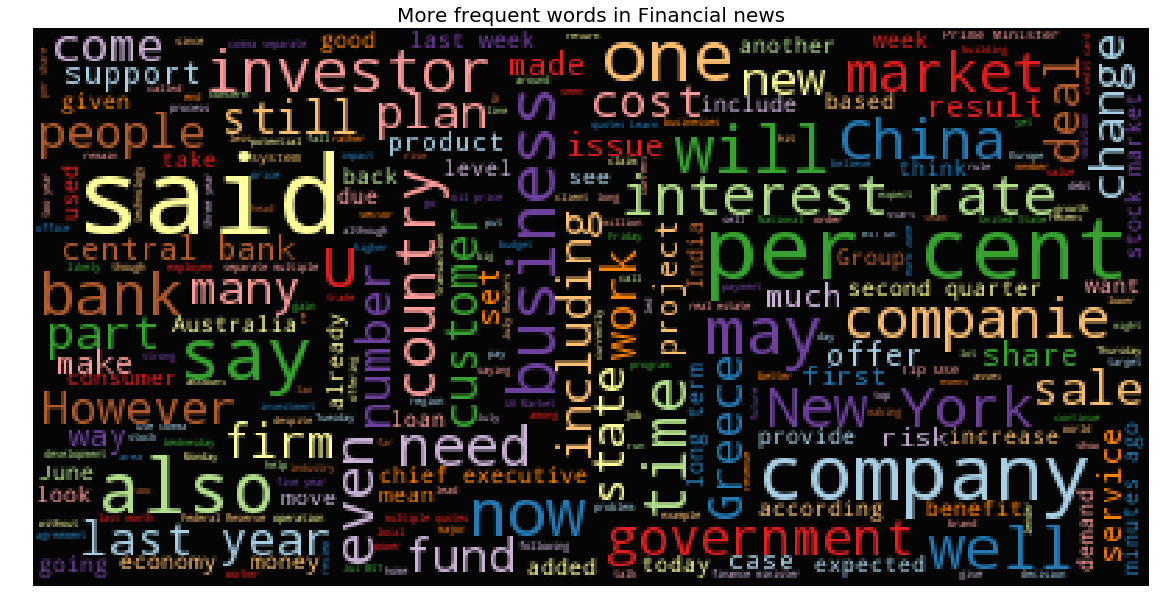

In [54]:
news_wc = news.text[news.type == 3]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Financial news", fontsize=20);

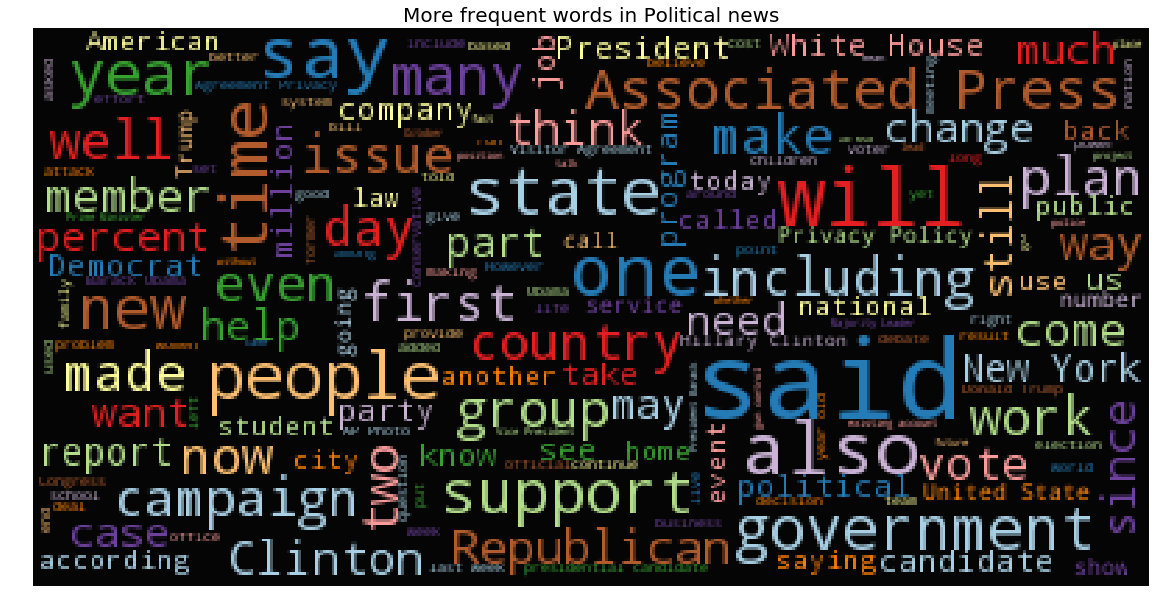

In [55]:
news_wc = news.text[news.type == 4]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Political news", fontsize=20);

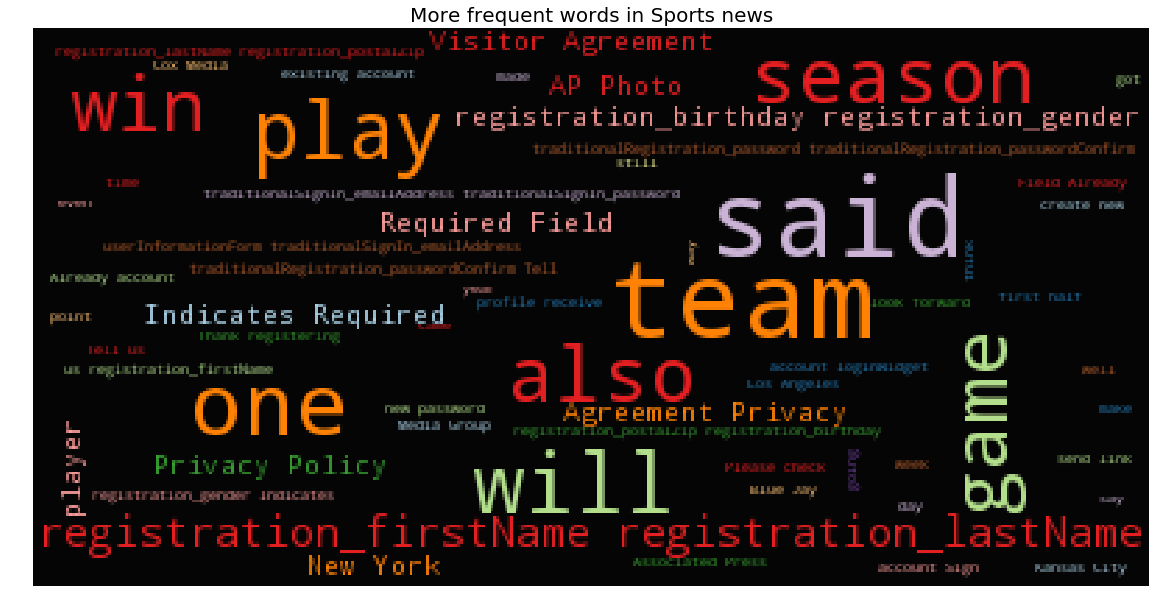

In [56]:
news_wc = news.text[news.type == 5]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Sports news", fontsize=20);

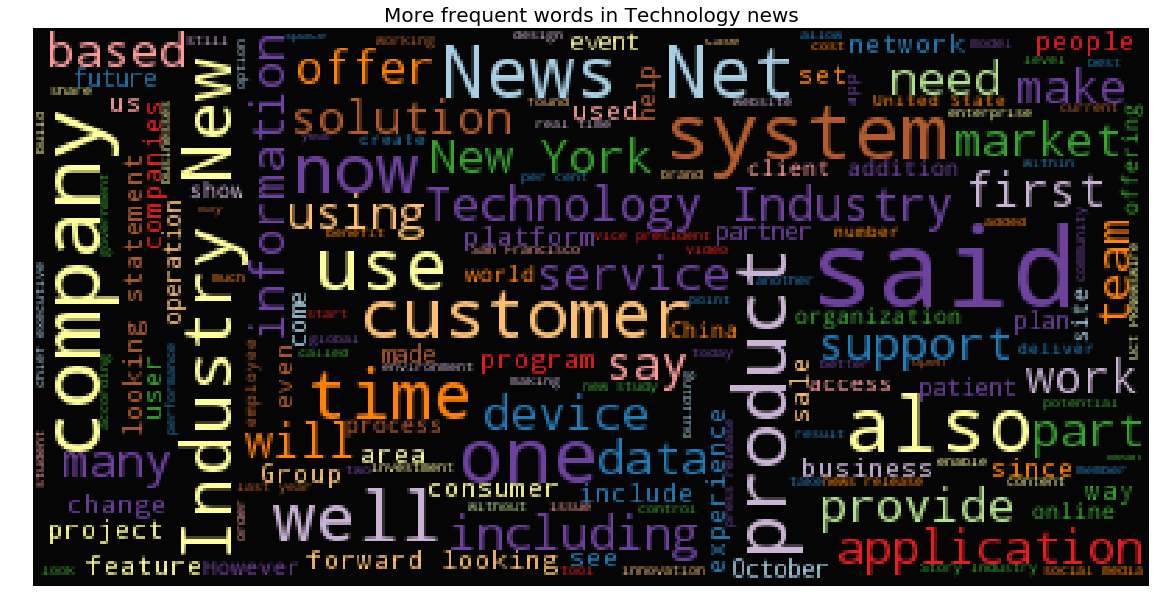

In [57]:
news_wc = news.text[news.type == 6]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Technology news", fontsize=20);

In [63]:
news[news.type == 5].text.values

array([ "> Pennsylvania Bell's 1-yard TD run at buzzer lifts Steelers over Chargers Pittsburgh Steelers head coach Mike Tomlin celebrates defeating the San Diego Chargers in an NFL football game Monday, Oct. 12, 2015, in San Diego. The Steelers won 24-20. (AP Photo/Gregory Bull) \n© 2015 Cox Media Group . By using this website, you accept the terms of our Visitor Agreement and Privacy Policy , and understand your options regarding Ad Choices . \nNeed a Profile? Register Now. {* #userInformationForm *} Forgot your password? {* traditionalSignIn_password *} {* traditionalSignIn_signInButton *} {* /userInformationForm *} Sign in using your existing account {* loginWidget *} \nNeed a Profile? Register Now. {* #userInformationForm *} Forgot your password? {* traditionalSignIn_password *} {* traditionalSignIn_signInButton *} {* /userInformationForm *} Sign in using your existing account {* loginWidget *} \nNeed a Profile? Register Now. {* #userInformationForm *} Forgot your password? {* trad

### Lets analyse the % of unique words in each news text, this might be a good indication of a webscrapping gone wrong too

In [64]:
news['unique_words'] = news.text.apply(lambda x: len(set(x.split())))
news['unique_words_%'] = news.apply(lambda row: row['unique_words'] / row['words'], axis=1)

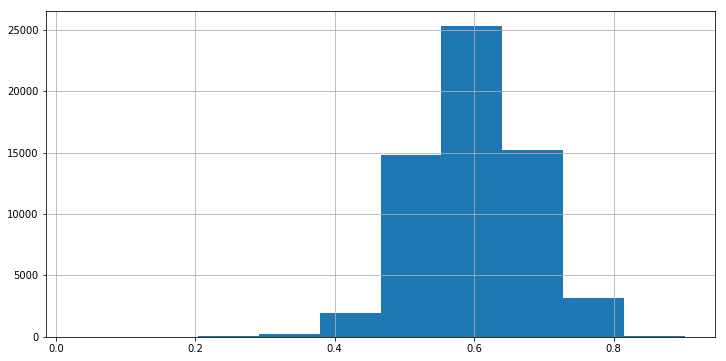

In [69]:
plt.figure(figsize=(12,6))
news['unique_words_%'].hist()

In [61]:
sum(news['unique_words_%'] < 0.3)

108

### There are some news with low % of unique words, lets look at an example

In [80]:
news[news['unique_words_%'] < 0.3].text[465]

'Movies on base through July 23 \n\nAtsugi THU: Big Hero 6, 2 p.m. (free); Entourage, 6 p.m. (adults only) FRI: Ant-Man, 6 p.m.; Trainwreck, 10 p.m. (adults only) SAT: Minions, 2 p.m.; Ant-Man (3-D), 5 p.m.; Dope, 10 p.m. (adults only) SUN: Minions, 2 p.m.; Dope, 5 p.m. (adults only); Ant-Man, 8 p.m. (adults only) MON: Lilo & Stitch, 2 p.m. (free); Trainwreck, 6 p.m. (adults) THU: Kung Fu Panda, 2 p.m. (free); Sailors’ Choice, 7 p.m. (adults only) Advertisement \nRichard Bong (Misawa) WED: Ted 2, 6 p.m. (adults only) THU: Magic Mike XXL, 6 p.m. (adults only) FRI: Ant-Man, 6 p.m.; Ant-Man (3-D), 9:30 p.m. SAT: Minions, 2 p.m.; Ant-Man, 5 p.m.; Trainwreck, 8:30 p.m. (adults only) SUN: Minions, 2 p.m.; Ant-Man, 5 p.m. MON: Minions, 3 p.m.; Trainwreck, 6 p.m. (adults only) TUE: Ant-Man (3-D), 6 p.m. WED: Tomorrowland, 3 p.m.; Trainwreck, 6 p.m. (adults only) THU: Ant-Man, 6 p.m. \nShowboat WED: Terminator: Genisys, 1 p.m.($1 matinee); Insidious: Chapter 3, 6:30 p.m. THU: Spy, 6:30 p.m. (ad

### We can ignore this kind of "news"

In [68]:
news = news[news['unique_words_%'] > 0.4]

In [87]:
news[news['unique_words_%'] > 0.9].text.values

array([ "Reprint \nApple reports strong iPhone sales, still coy about Watch Microsoft books $8.4 billion write-down on phones, 4th quarter beats depressed expectations FTC says LifeLock isn't providing the level of identity protection that it had promised Airlines turning to biofuels to meet emissions rules, capitalize on growth in air travel Citi to refund $700 million to customers, pay $70 million in fines, for illegal card practices Unemployment rates fell in 21 US states in June, held down by shrinking workforce US stocks end lower after several companies including IBM report disappointing results Chipotle's sales growth falls short of Wall Street expectations Inspectors find erosion under 2 other bridges on California interstate where span collapsed World mayors at Vatican: Climate change is real, man-made and must be contained Copyright 2014 Associated Press. All rights reserved. This material may not be published, broadcast, rewritten or redistributed. Check Out Our Best Service

In [90]:
news.shape

(60835, 12)

### Punctuation is another method that probably can help us identify news that we should ignore:

In [91]:
news[news.type == 5].text.values

array([ "> Pennsylvania Bell's 1-yard TD run at buzzer lifts Steelers over Chargers Pittsburgh Steelers head coach Mike Tomlin celebrates defeating the San Diego Chargers in an NFL football game Monday, Oct. 12, 2015, in San Diego. The Steelers won 24-20. (AP Photo/Gregory Bull) \n© 2015 Cox Media Group . By using this website, you accept the terms of our Visitor Agreement and Privacy Policy , and understand your options regarding Ad Choices . \nNeed a Profile? Register Now. {* #userInformationForm *} Forgot your password? {* traditionalSignIn_password *} {* traditionalSignIn_signInButton *} {* /userInformationForm *} Sign in using your existing account {* loginWidget *} \nNeed a Profile? Register Now. {* #userInformationForm *} Forgot your password? {* traditionalSignIn_password *} {* traditionalSignIn_signInButton *} {* /userInformationForm *} Sign in using your existing account {* loginWidget *} \nNeed a Profile? Register Now. {* #userInformationForm *} Forgot your password? {* trad

In [ ]:
news['punctuation'] = news['text'].apply(lambda comment: len([y for y in comment if y in string.punctuation]))
news['punctuation_%'] = news.apply(lambda row: row['punctuation']/row['words'], axis=1)

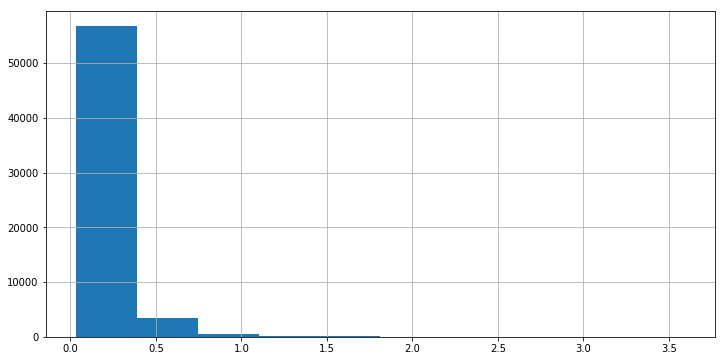

In [89]:
plt.figure(figsize=(12,6))
news['punctuation_%'].hist()

### We have some news with more punctuation than words, we need to ignore that, there is something wrong there

### Even with a 0.5 here is too high, it means there is a punctuation sign for each two words. 

In [104]:
news[news['punctuation_%'] > 0.5].text.values

array([ 'Movies on base through August 6 \n\nAtsugi THU: Puss in Boots, 2 p.m.; Terminator Genisys, 6 p.m. FRI: Magic Mike XXL, 8 p.m. (adults only) SAT: Minions, 2 p.m.; Mission: Impossible -- Rogue Nation, 5 p.m.; Vacation, 10 p.m. (adults only) SUN: Surf’s Up, 2 p.m. (free admission); Pixels, 5 p.m.; Mission: Impossible -- Rogue Nation, 8 p.m. MON: Ice Age, 2 p.m. (free admission) THU: Hotel Transylvania, 2 p.m. (free admission); Vacation, 6 p.m. (adults only) Advertisement \nRichard Bong (Misawa) WED: Ant-Man, 6 p.m. THU: Ted 2, 6 p.m. (adults only) FRI: Mission: Impossible -- Rogue Nation, 6 and 9:30 p.m. SAT: Minions, 2 p.m.; Mission: Impossible -- Rogue Nation, 4:30 p.m.; Vacation, 8 p.m. (adults only) SUN: Minions, 2 p.m.; Mission: Impossible -- Rogue Nation, 4:30 p.m. MON: Max, 3 p.m.; Vacation, 6 p.m. (adults only) TUE: Pixels, 6 p.m. WED: Inside Out, 3 p.m.; Vacation, 6 p.m. (adults only) THU: Insidious: Chapter 3, 6 p.m. \nShowboat WED: Inside Out, 1 p.m. ($1 matinee); Pixe

In [107]:
news[news['punctuation_%'] > 0.3].shape

(5804, 12)

### we are going to ignore anything with a value higher than 0.3, we only want news with less than 1 punctuation sign for each 3 words

In [108]:
news = news[news['punctuation_%'] < 0.3]

In [109]:
news.shape

(55019, 12)

## in the end we have 55k news, hopefully those will be clean news

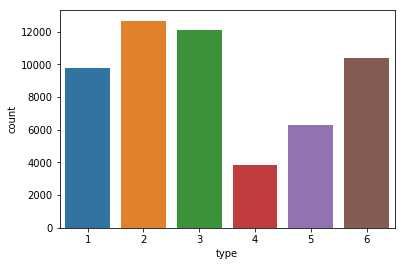

In [110]:
sns.countplot(news.type)

## looking at the Wordcloud to see if it improved 

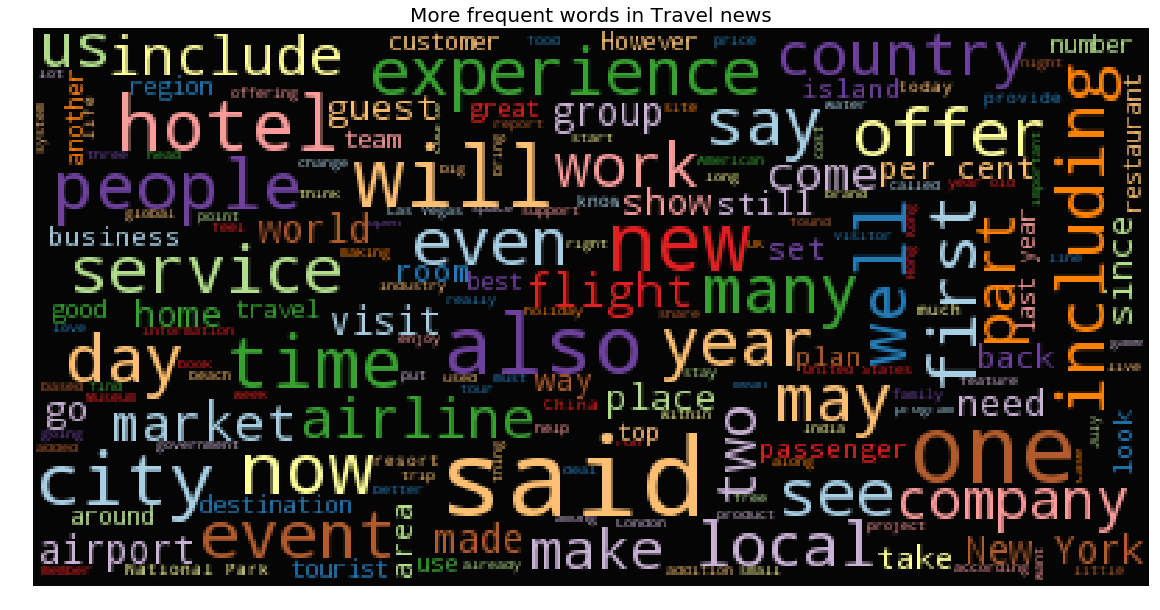

In [111]:
news_wc = news.text[news.type == 1]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Travel news", fontsize=20);

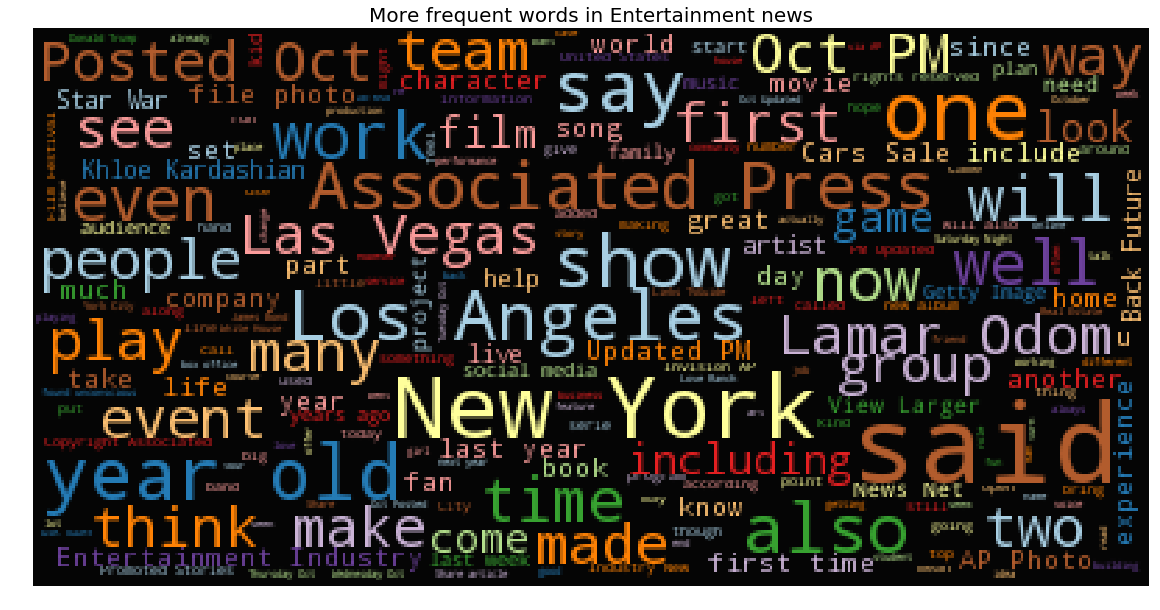

In [112]:
news_wc = news.text[news.type == 2]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Entertainment news", fontsize=20);

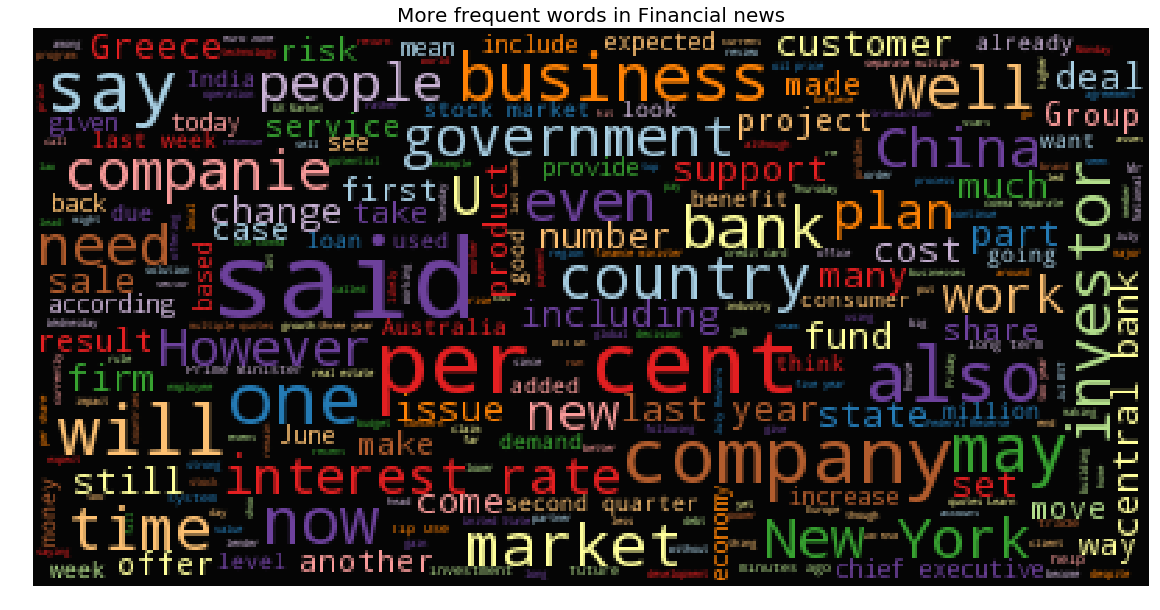

In [113]:
news_wc = news.text[news.type == 3]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Financial news", fontsize=20);

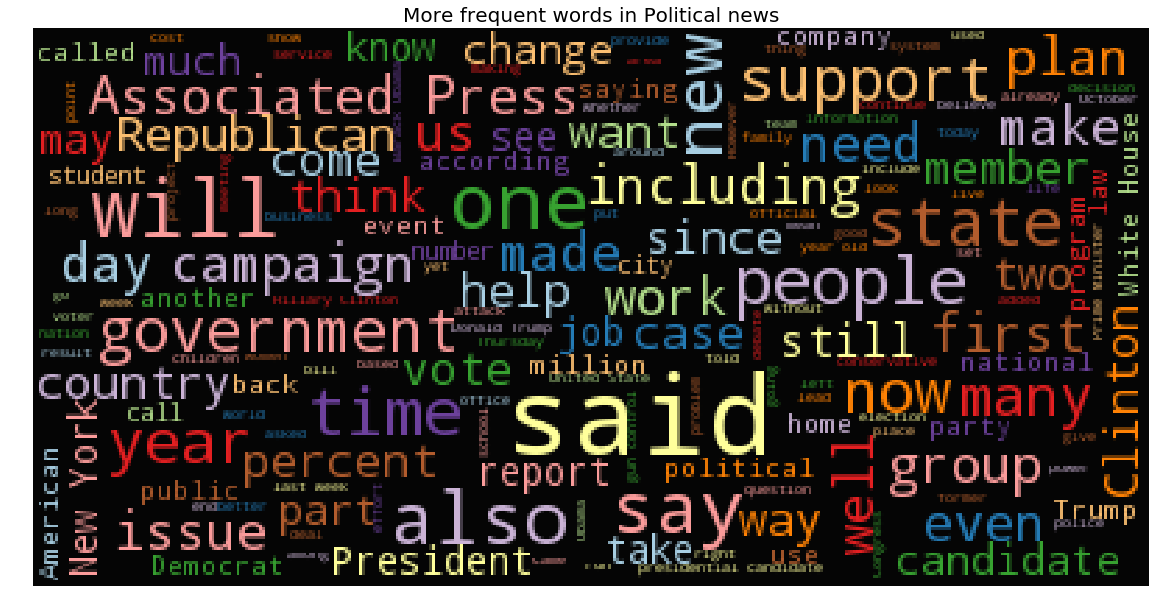

In [114]:
news_wc = news.text[news.type == 4]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Political news", fontsize=20);

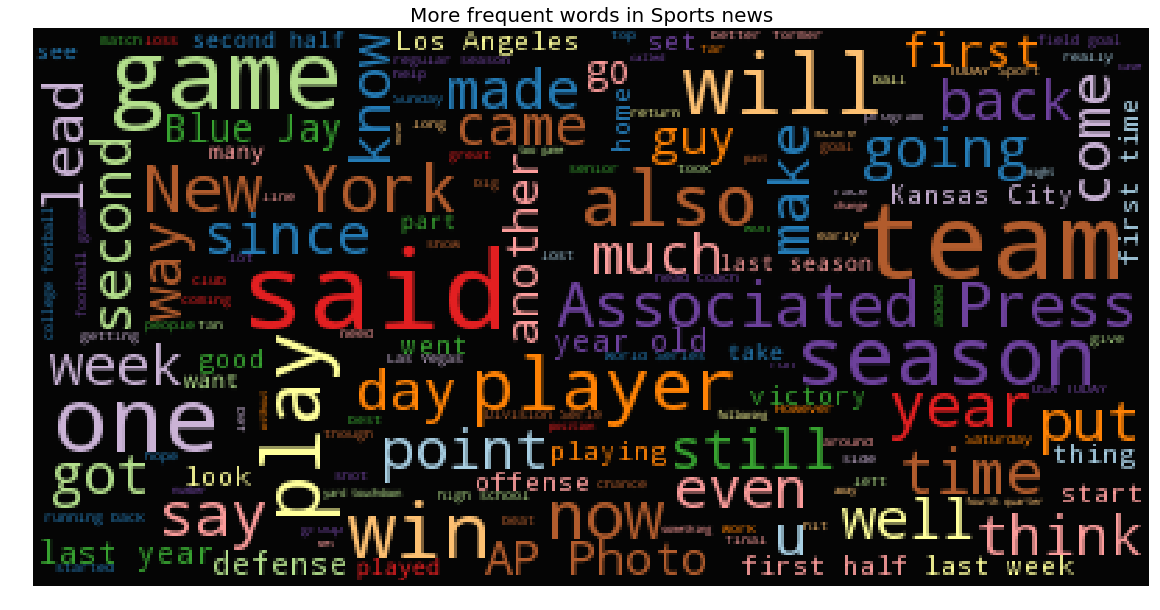

In [115]:
news_wc = news.text[news.type == 5]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Sports news", fontsize=20);

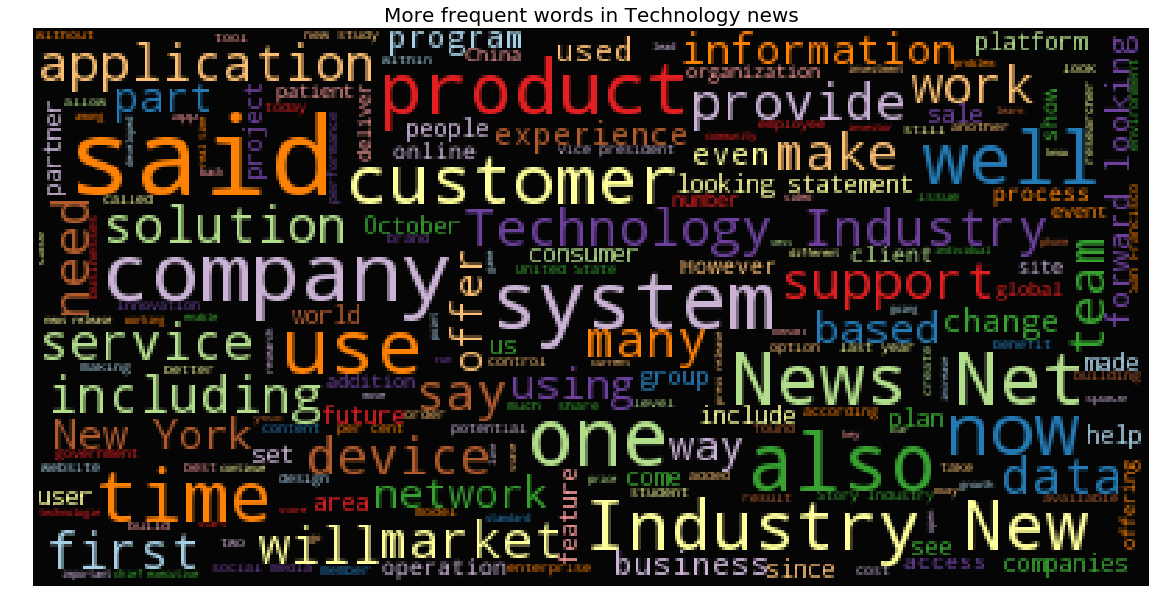

In [116]:
news_wc = news.text[news.type == 6]

plt.figure(figsize=(20,12))
wc = WordCloud(background_color="black", max_words=500, stopwords=STOPWORDS, max_font_size= 40)

wc.generate(" ".join(news_wc))

plt.imshow(wc.recolor( colormap= 'Paired_r'), alpha=0.98)
plt.axis("off")
plt.title("More frequent words in Technology news", fontsize=20);